# Analysis of Priority Populations Data by Subcounty, October-December 2024 and Merging with Subcounty Geographic Data

In [262]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [263]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [264]:
pp = pd.read_csv('Priority Popns reached with HIV Prevention Interventions.xlsx - PP_PREV .csv')

In [265]:
pd.set_option('display.max_columns', None)

In [266]:
pp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,HIV_Prev,HIV_Prev.1,HIV_Prev.2,HIV_Prev.3,HIV_Prev.4,HIV_Prev.5,HIV_Prev.6,HIV_Prev.7,HIV_Prev.8,HIV_Prev.9,HIV_Prev.10,HIV_Prev.11,HIV_Prev.12,HIV_Prev.13,HIV_Prev.14,HIV_Prev.15,HIV_Prev.16,HIV_Prev.17,HIV_Prev.18,HIV_Prev.19,HIV_Prev.20,HIV_Prev.21,HIV_Prev.22,HIV_Prev.23,PP_PREV,PP_PREV.1,PP_PREV.2,PP_PREV.3,PP_PREV.4,PP_PREV.5,PP_PREV.6,PP_PREV2,PP_PREV3,PP_PREV4,PP_PREV5,PP_PREV6,PP_PREV7,PP_PREV8,PP_PREV9,PP_PREV10,PP_PREV11,HIV_test,HIV_test.1,HIV_test.2,HIV_test.3,HIV_test.4,HIV_test.5,HIV_test.6,HIV_test.7,HIV_test.8,HIV_test.9,HIV_pos_test,HIV_pos_test.1,HIV_pos_test.2,HIV_pos_test.3,HIV_pos_test.4,HIV_pos_test.5,HIV_pos_test.6,HIV_pos_test.7,HIV_pos_test.8,HIV_pos_test.9,New_ART,New_ART.1,New_ART.2,New_ART.3,New_ART.4,New_ART.5,New_ART.6,New_ART.7,New_ART.8,New_ART.9,PP_ART,PP_ART.1,PP_ART.2,PP_ART.3,PP_ART.4,PP_ART.5,PP_ART.6,PP_ART.7,PP_ART.8,PP_ART.9,VL eligible,VL eligible.1,VL eligible.2,VL eligible.3,VL eligible.4,VL eligible.5,VL eligible.6,VL eligible.7,VL eligible.8,VL eligible.9,VL_lab_doc,VL_lab_doc.1,VL_lab_doc.2,VL_lab_doc.3,VL_lab_doc.4,VL_lab_doc.5,VL_lab_doc.6,VL_lab_doc.7,VL_lab_doc.8,VL_lab_doc.9,VL_supp,VL_supp.1,VL_supp.2,VL_supp.3,VL_supp.4,VL_supp.5,VL_supp.6,VL_supp.7,VL_supp.8,VL_supp.9,summary,summary.1,summary.2,summary.3,summary.4,summary.5,summary.6,summary.7,summary.8,summary.9,summary.10,summary.11,summary.12,summary.13
0,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,Numerator: \nOverall Total,"10-14 Years, Female","10-14 Years, Male","(15 - 19) Years, Female","(15 - 19) Years, Male","20-24 Years, Female","20-24 Years, Male","25-29 Years, Female","25-29 Years, Male","30-34 Years, Female","30-34 Years, Male","(35 - 39) Years, Female","(35 - 39) Years, Male","40-44 Years, Female","40-44 Years, Male","45-49 Yrears, Female","45-49 Yrears, Male","50+ Years, Female","50+ Years, Male",PP_PREV HTS services: Overall Total,Known HIV Positive,Newly tested and/or referred for testing,Declined testing and/or referral,Test not required based on risk assessment,Displaced Persons,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients of Sex Workers,Military and other Uniform Services,Mobile Populations,Truck Drivers,Fishing communities,Non-injecting drug users,Any Other Priority Population,Adolescents (10-24),Displaced Persons,Discordant Couples,Clients

In [267]:
# 1) grab first and second header rows
first_headers  = pp.columns.tolist()
second_headers = pp.iloc[0].astype(str).tolist()

# 2) build a proper two‐level MultiIndex
pp.columns = pd.MultiIndex.from_tuples(
    list(zip(first_headers, second_headers))
)

# 3) drop the row that you just used as header
pp = pp.iloc[1:].reset_index(drop=True)

# 4) flatten, but treat cols 0-14 differently
flattened = []
for idx, (lvl1, lvl2) in enumerate(pp.columns):
    if idx < 17:
        # for the first 15 columns: use only the second‐row name
        flattened.append(lvl2)
    else:
        # for the rest: combine first and second with underscore
        if pd.isna(lvl1) or lvl1 == "":
            flattened.append(lvl2)
        else:
            flattened.append(f"{lvl1}_{lvl2}")

pp.columns = flattened

In [268]:
pp.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [269]:
pp.dtypes

Region                      object
District                    object
 Subcounty                  object
Service outlet              object
Tracker HF ID               object
                             ...  
summary.9_TX_CURR           object
summary.10_VL eligible      object
summary.11_VL tested        object
summary.12_VL suppressed    object
summary.13_nan              object
Length: 142, dtype: object

In [270]:
pp.fillna(0, inplace=True)

In [271]:
pp.shape

(732, 142)

In [272]:
# Define exactly the list of PP_PREV columns you want to sum:
prev_cols = [
    "PP_PREV2_Adolescents (10-24)",
    "PP_PREV3_Displaced Persons",
    "PP_PREV4_Discordant Couples",
    "PP_PREV5_Clients of  Sex Workers",
    "PP_PREV6_Military and other Uniform Services",
    "PP_PREV7_Mobile Populations",
    "PP_PREV8_Truck Drivers",
    "PP_PREV9_Fishing communities",
    "PP_PREV10_Non-injecting drug users",
    "PP_PREV11_Any Other Priority Population"
]

# Then you can coerce to numeric, fill NaNs, and sum:
pp[prev_cols] = pp[prev_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
pp['PP_PREV2'] = pp[prev_cols].sum(axis=1).astype(int)

In [273]:
pp['PP_PREV2'] = pp['PP_PREV2_Adolescents (10-24)'] + pp['PP_PREV3_Displaced Persons'] + pp['PP_PREV4_Discordant Couples'] + pp['PP_PREV5_Clients of  Sex Workers'] + pp['PP_PREV6_Military and other Uniform Services'] + pp['PP_PREV7_Mobile Populations'] + pp['PP_PREV8_Truck Drivers'] + pp['PP_PREV9_Fishing communities'] + pp['PP_PREV10_Non-injecting drug users'] + pp['PP_PREV11_Any Other Priority Population'] 

In [274]:
pp.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [275]:
scty_tot_prev = pp.groupby(['District ', ' Subcounty'])['PP_PREV2'].sum().reset_index()

In [276]:
scty_tot_prev

,District,Subcounty,PP_PREV2
0,Abim District,Abim Subcounty,1
1,Adjumani District,Adjumani Town Council,885
2,Adjumani District,Adropi Subcounty,2
3,Adjumani District,Pakele Subcounty,1
4,Agago District,Adilang Subcounty,458
...,...,...,...
515,Yumbe District,Lodonga Town Council,18
516,Yumbe District,Yumbe Town Council,525
517,Zombo District,Nyapea Subcounty,75
518,Zombo District,Paidha Town Council,1687


In [277]:
scty_tot_prev = scty_tot_prev.rename(columns={'PP_PREV2': 'subcounty_PP_PREV_total'})

In [278]:
pp2 = pd.merge(pp, scty_tot_prev, on=['District ',' Subcounty'], how='left')

In [279]:
pp['summary.2_Known HIV Positive'] = (
    pp['summary.2_Known HIV Positive']
    .str.replace(',', '')
    .astype(float)
    .astype('Int64')  # keeps NaNs while storing as integers
)

In [280]:
scty_tot_pos = pp.groupby(['District ', ' Subcounty'])['summary.2_Known HIV Positive'].sum().reset_index()

In [281]:
scty_tot_pos['pp_known_pos_subcounty'] = scty_tot_pos['summary.2_Known HIV Positive']

In [282]:
scty_tot_pos = scty_tot_pos.drop(columns='summary.2_Known HIV Positive')

In [283]:
pp2 = pd.merge(pp2, scty_tot_pos, on=['District ',' Subcounty'], how='left')

In [284]:
pp2.head(15)

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [285]:
import numpy as np

In [286]:
pp2['pct_pp_prev_pop_subcounty'] = pp2['PP_PREV2']/pp2['subcounty_PP_PREV_total']

In [287]:
pp2['pct_pp_prev_pop_subcounty'] = pp2['pct_pp_prev_pop_subcounty'].replace(0, np.nan)

In [291]:
pp2['pct_pp_prev_pop_subcounty'].min()

0.000846740050804403

In [295]:
pp2['summary.2_Known HIV Positive'] = pd.to_numeric(pp2['summary.2_Known HIV Positive'], errors='coerce')
pp2['pp_known_pos_subcounty'] = pd.to_numeric(pp2['pp_known_pos_subcounty'], errors='coerce')

mask = pp2['pp_known_pos_subcounty'] != 0
pp2['pct_pp_pos_pop_subcounty'] = np.nan  # initialize column
pp2.loc[mask, 'pct_pp_pos_pop_subcounty'] = (
    pp2.loc[mask, 'summary.2_Known HIV Positive'] / pp2.loc[mask, 'pp_known_pos_subcounty']
)


In [296]:
pp2['pct_pp_pos_pop_subcounty'] = pp2['summary.2_Known HIV Positive']/pp2['pp_known_pos_subcounty']

In [297]:
pp2.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [298]:
pp2['pct_pp_pos_pop_subcounty'] = pp2['pct_pp_pos_pop_subcounty'].fillna(0)

In [299]:
pp2.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [326]:
pp2.to_csv('pp_revised.csv', index=False)

In [300]:
pp2.groupby(['District ', ' Subcounty'])['pct_pp_pos_pop_subcounty'].sum().sort_values()

District            Subcounty                         
Wakiso District    Ndejje Division                        0.241898
Kampala District   Rubaga Division                             1.0
Abim District      Abim Subcounty                              1.0
Kyotera District   Kakuuto Subcounty                           1.0
                   Kabira Subcounty (Kyotera District)         1.0
                                                            ...   
Kyenjojo District  Kisojo Town Council                         NaN
Kyotera District   Kasasa Subcounty                            NaN
                   Nabigasa Subcounty                          NaN
Kitgum District    Pandwong Division                           NaN
Zombo District     Zombo Town Council                          NaN
Name: pct_pp_pos_pop_subcounty, Length: 520, dtype: Float64

In [301]:
pp2['usaid'] = (pp2['COP US Agency'] == 'USAID').astype(int)

In [302]:
pp2['cdc'] = (pp2['COP US Agency'] == 'CDC').astype(int)

In [303]:
pp2['dod'] = (pp2['COP US Agency'] == 'DOD').astype(int)

In [330]:
priority_cols = [
    'PP_PREV2_Adolescents (10-24)',
    'PP_PREV3_Displaced Persons',
    'PP_PREV4_Discordant Couples',
    'PP_PREV5_Clients of  Sex Workers',
    'PP_PREV6_Military and other Uniform Services',
    'PP_PREV7_Mobile Populations',
    'PP_PREV8_Truck Drivers',
    'PP_PREV9_Fishing communities',
    'PP_PREV10_Non-injecting drug users',
    'PP_PREV11_Any Other Priority Population'
]

usaid_pp = pp2[pp2['usaid'] == 1][priority_cols].sum()

In [332]:
usaid_pp = usaid_pp.reset_index()

In [336]:
usaid_pp = usaid_pp.rename(columns={'index': 'Priority Population', 0: 'USAID-Supported'})

In [337]:
usaid_pp

,Priority Population,USAID-Supported
0,PP_PREV2_Adolescents (10-24),5986
1,PP_PREV3_Displaced Persons,10
2,PP_PREV4_Discordant Couples,3666
3,PP_PREV5_Clients of Sex Workers,16518
4,PP_PREV6_Military and other Uniform Services,1513
5,PP_PREV7_Mobile Populations,7861
6,PP_PREV8_Truck Drivers,4230
7,PP_PREV9_Fishing communities,6767
8,PP_PREV10_Non-injecting drug users,2702
9,PP_PREV11_Any Other Priority Population,9764


In [338]:
priority_cols = [
    'PP_PREV2_Adolescents (10-24)',
    'PP_PREV3_Displaced Persons',
    'PP_PREV4_Discordant Couples',
    'PP_PREV5_Clients of  Sex Workers',
    'PP_PREV6_Military and other Uniform Services',
    'PP_PREV7_Mobile Populations',
    'PP_PREV8_Truck Drivers',
    'PP_PREV9_Fishing communities',
    'PP_PREV10_Non-injecting drug users',
    'PP_PREV11_Any Other Priority Population'
]

cdc_pp = pp2[pp2['cdc'] == 1][priority_cols].sum()

In [339]:
cdc_pp = cdc_pp.reset_index()

In [340]:
cdc_pp = cdc_pp.rename(columns={'index': 'Priority Population', 0: 'CDC-Supported'})

In [341]:
cdc_pp

,Priority Population,CDC-Supported
0,PP_PREV2_Adolescents (10-24),25649
1,PP_PREV3_Displaced Persons,44
2,PP_PREV4_Discordant Couples,12329
3,PP_PREV5_Clients of Sex Workers,43517
4,PP_PREV6_Military and other Uniform Services,2437
5,PP_PREV7_Mobile Populations,10425
6,PP_PREV8_Truck Drivers,4742
7,PP_PREV9_Fishing communities,25226
8,PP_PREV10_Non-injecting drug users,1644
9,PP_PREV11_Any Other Priority Population,5833


In [342]:
priority_cols = [
    'PP_PREV2_Adolescents (10-24)',
    'PP_PREV3_Displaced Persons',
    'PP_PREV4_Discordant Couples',
    'PP_PREV5_Clients of  Sex Workers',
    'PP_PREV6_Military and other Uniform Services',
    'PP_PREV7_Mobile Populations',
    'PP_PREV8_Truck Drivers',
    'PP_PREV9_Fishing communities',
    'PP_PREV10_Non-injecting drug users',
    'PP_PREV11_Any Other Priority Population'
]

dod_pp = pp2[pp2['dod'] == 1][priority_cols].sum()

In [343]:
dod_pp = dod_pp.reset_index()

In [344]:
dod_pp = dod_pp.rename(columns={'index': 'Priority Population', 0: 'DOD-Supported'})

In [345]:
dod_pp

,Priority Population,DOD-Supported
0,PP_PREV2_Adolescents (10-24),3568
1,PP_PREV3_Displaced Persons,0
2,PP_PREV4_Discordant Couples,1702
3,PP_PREV5_Clients of Sex Workers,6042
4,PP_PREV6_Military and other Uniform Services,1820
5,PP_PREV7_Mobile Populations,2889
6,PP_PREV8_Truck Drivers,442
7,PP_PREV9_Fishing communities,8831
8,PP_PREV10_Non-injecting drug users,157
9,PP_PREV11_Any Other Priority Population,195


In [346]:
pp_prev_by_funder = usaid_pp.merge(cdc_pp, on='Priority Population', how='left').merge(dod_pp, on='Priority Population', how='left')

In [347]:
pp_prev_by_funder

,Priority Population,USAID-Supported,CDC-Supported,DOD-Supported
0,PP_PREV2_Adolescents (10-24),5986,25649,3568
1,PP_PREV3_Displaced Persons,10,44,0
2,PP_PREV4_Discordant Couples,3666,12329,1702
3,PP_PREV5_Clients of Sex Workers,16518,43517,6042
4,PP_PREV6_Military and other Uniform Services,1513,2437,1820
5,PP_PREV7_Mobile Populations,7861,10425,2889
6,PP_PREV8_Truck Drivers,4230,4742,442
7,PP_PREV9_Fishing communities,6767,25226,8831
8,PP_PREV10_Non-injecting drug users,2702,1644,157
9,PP_PREV11_Any Other Priority Population,9764,5833,195


In [348]:
pp_prev_by_funder.to_csv('pp_prev_by_funder.csv', index=False)

In [ ]:
pct_usaid_PP

In [305]:
pct_usaid_subcounty = pp2[pp2['usaid'] == 1].groupby(['District ',' Subcounty'])['pct_pp_prev_pop_subcounty'].sum().sort_values(ascending=False).reset_index()

In [306]:
pct_usaid_subcounty.size

474

In [307]:
pct_usaid_subcounty[pct_usaid_subcounty['pct_pp_prev_pop_subcounty'] == 1].size

435

In [308]:
usaid_pct = (
    pp2[pp2['usaid'] == 1]
    .groupby(['District ', ' Subcounty'])['pct_pp_prev_pop_subcounty']
    .sum()
    .reset_index()
)

In [171]:
usaid_pct

,District,Subcounty,pct_pp_prev_pop_subcounty
0,Agago District,Adilang Subcounty,1.000000
1,Agago District,Patongo Town Council,1.000000
2,Alebtong District,Alebtong Town Council,1.000000
3,Amolatar District,Amolatar Town Council,1.000000
4,Amolatar District,Aputi Subcounty,1.000000
...,...,...,...
153,Sironko District,Sironko Town Council,1.000000
154,Tororo District,Eastern Division (Tororo MC),1.000000
155,Tororo District,Malaba Town Council,1.000000
156,Tororo District,Mukuju Subcounty,0.997279


In [325]:
usaid_pct.to_csv('usaid_pct_pp.csv', index=False)

In [310]:
import numpy as np

# (1) Compute USAID’s summed coverage per subcounty
usaid_sum = (
    pp2[pp2['usaid'] == 1]
      .groupby(['District ',' Subcounty'])['pct_pp_prev_pop_subcounty']
      .sum()
      .rename('pct_usaid_subcounty')
)

# (2) Build a one‐row‐per‐subcounty table of who’s funding it
flags = (
    pp2
    .groupby(['District ',' Subcounty'])
    .agg(
        has_usaid=('usaid', 'max'),
        has_cdc  =('cdc',   'max'),
        has_dod  =('dod',   'max')
    )
    .reset_index()
)

# (3) Merge the two
result = flags.merge(usaid_sum, on=' Subcounty', how='left')

# (4) Apply your fill logic:
#   • Pure USAID only       → 1  
#   • CDC or DOD only       → 0  
#   • Neither USAID/CDC/DOD → NaN  
mask_pure_usaid = (
    (result['has_usaid'] == 1) &
    (result['has_cdc']   == 0) &
    (result['has_dod']   == 0)
)
mask_other_only = (
    (result['has_usaid'] == 0) &
    ((result['has_cdc'] == 1) | (result['has_dod'] == 1))
)

# set pure‐USAID → 1
result.loc[mask_pure_usaid, 'pct_usaid_subcounty'] = 1

# set CDC/DOD‐only → 0
result.loc[mask_other_only, 'pct_usaid_subcounty'] = 0

# (5) (optional) sort
result = result.sort_values('pct_usaid_subcounty', ascending=False)

# now `result` has exactly one row per subcounty, and
#   pct_usaid_subcounty = 
#     1   if only USAID funds,
#     0   if only CDC or DOD fund,
#     NaN if nobody funds,
#     (or the summed fraction if mixed USAID+others)


In [311]:
result['pct_usaid_subcounty'].value_counts()

pct_usaid_subcounty
0.000000    357
1.000000    146
0.997279      1
0.995828      1
0.995495      1
0.995406      1
0.991870      1
0.988576      1
0.880952      1
0.837838      1
0.743077      1
0.655405      1
0.630560      1
0.253521      1
Name: count, dtype: int64

In [312]:
result.to_csv('pct_usaid_subcounty_pp_prev.csv', index=False)

In [349]:
prep_pop = pd.read_csv('uganda_prep_with_pop.csv')

In [350]:
prep_pop

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty,District,Subcounty,subcounty_pop_adjusted
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633,0.0,Adjumani District,Adjumani Town Council,36495.99
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367,0.0,Adjumani District,Adjumani Town Council,36495.99
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000,1.0,Agago District,Adilang Town Council,NaN
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000,1.0,Agago District,Kalongo Town Council,20056.16
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000,1.0,Agago District,Patongo Town Council,11873.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0,0,1,0,1457.0,1457.0,1.000000,0.0,Wakiso District,Wakiso Town Council,124032.60
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0,1,0,11.0,11.0,1.000000,0.0,Yumbe District,Lodonga Town Council,33578.00
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0,0,1,0,971.0,971.0,1.000000,0.0,Yumbe District,Yumbe Town Council,35850.18
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0,0,1,0,60.0,60.0,1.000000,0.0,Zombo District,Nyapea Subcounty,21824.67


In [351]:
prep_pop['total'] = prep_pop['Transgender'] + prep_pop['Sex Workers'] + prep_pop['PWID'] + prep_pop['People in prisons and other enclosed settings (Incarcerated Population)'] + prep_pop['Pregnant'] + prep_pop['Breast feeding'] + prep_pop['Health Facility'] + prep_pop['Community'] + prep_pop['Adolescents and young women (10-24) years'] + prep_pop['Clients of sex workers']+ prep_pop['Displaced persons (e.g., refugees)'] + prep_pop['Fishing communities'] + prep_pop['Military and other uniformed services (including police, border guards, and security workers),Female'] + prep_pop['Mobile Populations (e.g., migrant workers, truck drivers)'] + prep_pop['Non-injecting drug users'] + prep_pop['Discordant Couples']

In [352]:
prep_pop['pct_pop_prep'] = prep_pop['total']/prep_pop['subcounty_pop_adjusted']

In [353]:
prep_pop

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty,District,Subcounty,subcounty_pop_adjusted,total,pct_pop_prep
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633,0.0,Adjumani District,Adjumani Town Council,36495.99,2047.0,0.056088
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367,0.0,Adjumani District,Adjumani Town Council,36495.99,33.0,0.000904
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000,1.0,Agago District,Adilang Town Council,NaN,906.0,NaN
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000,1.0,Agago District,Kalongo Town Council,20056.16,54.0,0.002692
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000,1.0,Agago District,Patongo Town Council,11873.84,776.0,0.065354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0,0,1,0,1457.0,1457.0,1.000000,0.0,Wakiso District,Wakiso Town Council,124032.60,2658.0,0.021430
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0,1,0,11.0,11.0,1.000000,0.0,Yumbe District,Lodonga Town Council,33578.00,22.0,0.000655
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0,0,1,0,971.0,971.0,1.000000,0.0,Yumbe District,Yumbe Town Council,35850.18,1884.0,0.052552
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0,0,1,0,60.0,60.0,1.000000,0.0,Zombo District,Nyapea Subcounty,21824.67,105.0,0.004811


In [354]:
prep_pop.to_csv('uganda_prep_with_pop.csv')

In [313]:
%%R

library(dplyr)
library(sf) 

In [314]:
%%R

subcounties <- sf::st_read("uga_admbnda_adm4_ubos_20200824.geojson")

Reading layer `uga_admbnda_adm4_ubos_20200824' from data source 
  `/Users/annikamcginnis/Documents/Data Studio/project-5/uga_admbnda_adm4_ubos_20200824.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1520 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 29.57216 ymin: -1.481474 xmax: 35.00105 ymax: 4.231367
Geodetic CRS:  WGS 84


In [356]:
%%R

prep <- read.csv("uganda_prep_with_pop.csv")

In [357]:
%%R

colnames(prep)

 [1] "X"                                                                                                   
 [2] "DHIS2.District"                                                                                      
 [3] "DHIS2.Subcounty"                                                                                     
 [4] "DHIS2.HF.Name"                                                                                       
 [5] "Agency"                                                                                              
 [6] "MSM..Male"                                                                                           
 [7] "Transgender"                                                                                         
 [8] "Sex.Workers"                                                                                         
 [9] "PWID"                                                                                                
[10] "People.in.prisons.and.

In [358]:
%%R

head(subcounties$ADM4_EN, 20)

 [1] "Abako"                 "Abanga"                "Abarilela"            
 [4] "Aber"                  "Abia"                  "Abim"                 
 [7] "Abim Town Council"     "Abindu Division"       "Abok"                 
[10] "Aboke"                 "Abongomola"            "Abuku"                
[13] "Acaba"                 "Acholibur"             "Acowa"                
[16] "Adeknino"              "Adekokwok"             "Adilang"              
[19] "Adjumani Town Council" "Adok"                 


In [359]:
%%R

head(prep$Subcounty, 20)

 [1] "Adjumani Town Council" "Adjumani Town Council" "Adilang Town Council" 
 [4] "Kalongo Town Council"  "Patongo Town Council"  "Alebtong Town Council"
 [7] "Amolatar Town Council" "Aputi Subcounty"       "Etam Town Council"    
[10] "Muntu Subcounty"       "Namasale Subcounty"    "Amuria Town Council"  
[13] "Attiak Town Council"   "Pabo Town Council"     "Akere Division"       
[16] "Akokoro Town Council"  "Ibuje Town Council"    "Arua Central Division"
[19] "Arua Central Division" "Ayivu Division"       


In [360]:
%%R

library(stringr)

In [361]:
%%R

prep <- prep %>%
  mutate(
    # 1) drop trailing " Subcounty"
    Subcounty = str_remove(Subcounty, " Subcounty$"),
    # 2) handle “(... MC)” → “... Municipality”
    Subcounty = case_when(
      str_detect(Subcounty, "\\(([^)]+) MC\\)$") ~
        str_replace(Subcounty, ".*\\(([^)]+) MC\\)$", "\\1 Municipality"),
      TRUE ~ Subcounty
    ),
    # 4) trim whitespace
    Subcounty = str_trim(Subcounty)
  )

In [321]:
%%R

# 1) initial “ADM4_EN” join
usaid_geo <- subcounties %>%
  left_join(
    prep,
    by = c("ADM4_EN" = "Subcounty")
  )

# 2) bring in a second pct via ADM3_EN for those still NA
usaid_geo <- usaid_geo %>%
  left_join(
    prep %>% 
      select(Subcounty, pct_usaid_subcounty),
    by = c("ADM3_EN" = "Subcounty"),
    suffix = c("", ".adm3")
  ) %>%
  mutate(
    # coalesce picks the ADM4_EN match first, then the ADM3_EN one
    pct_usaid_subcounty = coalesce(
      pct_usaid_subcounty,
      pct_usaid_subcounty.adm3
    )
  ) %>%
  select(-pct_usaid_subcounty.adm3)

# Now `merged_data` has:
# – pct_art_pop_subcounty filled from ADM4_EN where possible,
# – falling back to ADM3_EN where not.


In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 392 of `x` matches multiple rows in `y`.
ℹ Row 377 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


In [322]:
%%R

unmatched_usaid <- usaid_pct %>%
  anti_join(subcounties, by = c("Subcounty" = "ADM4_EN")) %>%
  pull(Subcounty)

# View them
unmatched_usaid

  [1] "Ntungamo Municipality"                   
  [2] "Awach Subcounty (Gulu District)"         
  [3] "Jinja Municipality"                      
  [4] "Kabale Municipality"                     
  [5] "Kabale Municipality"                     
  [6] "Mbale Municipality"                      
  [7] "Biharwe"                                 
  [8] "Pajule Town Council"                     
  [9] "Atanga Town Council"                     
 [10] "Minakulu Town Council"                   
 [11] "Loro Town Council"                       
 [12] "Kikagate Town Council"                   
 [13] "Jagusi"                                  
 [14] "Kityerera Sub county"                    
 [15] "Malongo Subcounty (Mayuge District)"     
 [16] "Mbale Industrial Division"               
 [17] "Kagongo Division"                        
 [18] "Iganga Municipality"                     
 [19] "Iganga Municipality"                     
 [20] "Kamdini Town Council"                    
 [21] "Kisoro Munici

In [323]:
%%R

library(ggplot2)

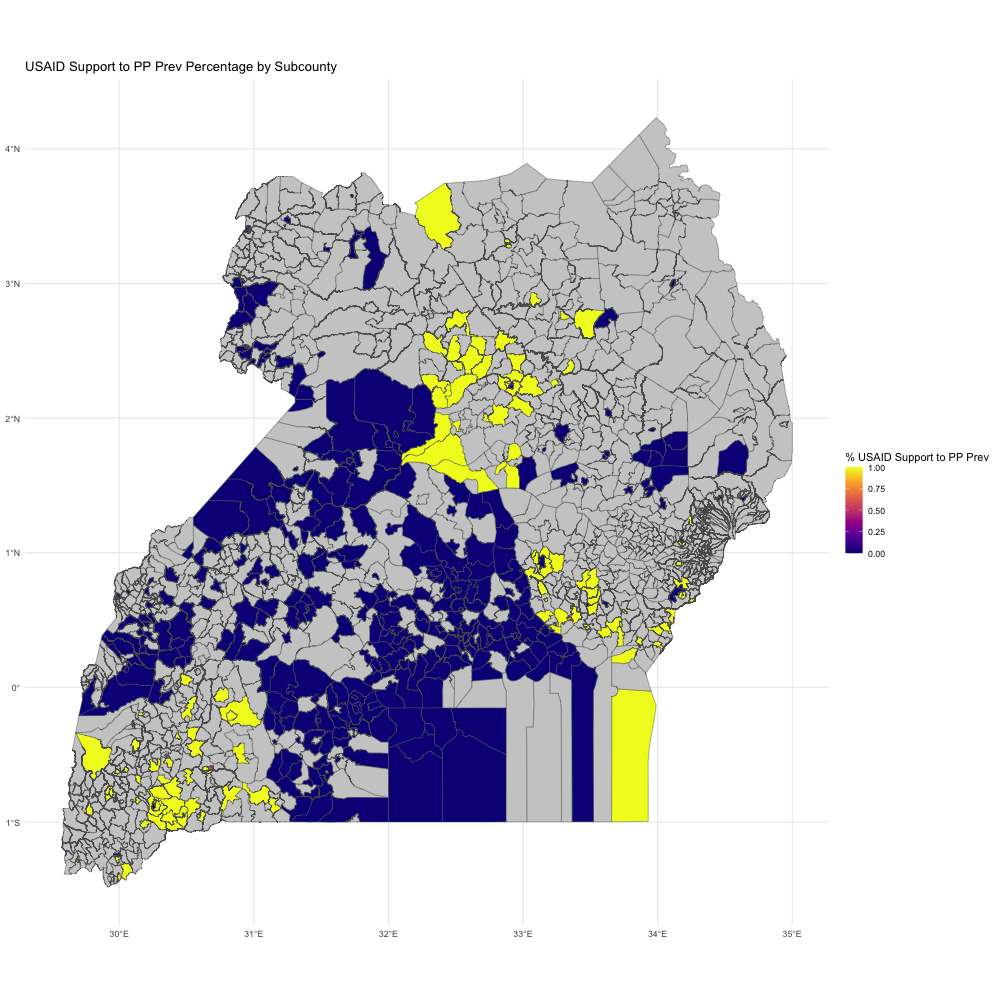

In [324]:
%%R -h 1000 -w 1000

ggplot(usaid_geo) +
  geom_sf(aes(fill = pct_usaid_subcounty)) +
  scale_fill_viridis_c(option = "plasma", na.value = "grey80") +
  theme_minimal() +
  labs(title = "USAID Support to PP Prev Percentage by Subcounty", fill = "% USAID Support to PP Prev")